In [1]:
import pandas as pd # manipulação de dados em formato de dataframe
import numpy as np # operações matemáticas
import seaborn as sns # visualização gráfica
import matplotlib.pyplot as plt # visualização gráfica
import plotly.graph_objects as go # gráficos 3D
from scipy.stats import pearsonr # correlações de Pearson
import statsmodels.api as sm # estimação de modelos
from statsmodels.iolib.summary2 import summary_col # comparação entre modelos
from sklearn.preprocessing import LabelEncoder # transformação de dados
import pingouin as pg # outro modo para obtenção de matrizes de correlações
import emojis # inserção de emojis em gráficos
from statstests.process import stepwise # procedimento Stepwise
from statstests.tests import shapiro_francia # teste de Shapiro-Francia
from scipy.stats import boxcox # transformação de Box-Cox
from scipy.stats import norm # para plotagem da curva normal
from scipy import stats # utilizado na definição da função 'breusch_pagan_test'

In [2]:
# In[EXEMPLO 4]:
#############################################################################
#            REGRESSÃO NÃO LINEAR E TRANSFORMAÇÃO DE BOX-COX                #
#               EXEMPLO 4 - CARREGAMENTO DA BASE DE DADOS                   #
#############################################################################

df_bebes = pd.read_csv('data/bebes.csv', delimiter=',')
df_bebes

# Características das variáveis do dataset
df_bebes.info()

# Estatísticas univariadas
df_bebes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   comprimento  74 non-null     float64
 1   idade        74 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


,comprimento,idade
count,74.000000,74.000000
mean,66.921622,25.312162
std,12.852386,12.975168
min,31.900000,2.150000
25%,56.470000,12.500000
50%,70.400000,26.000000
75%,75.807500,33.000000
max,87.630000,60.000000


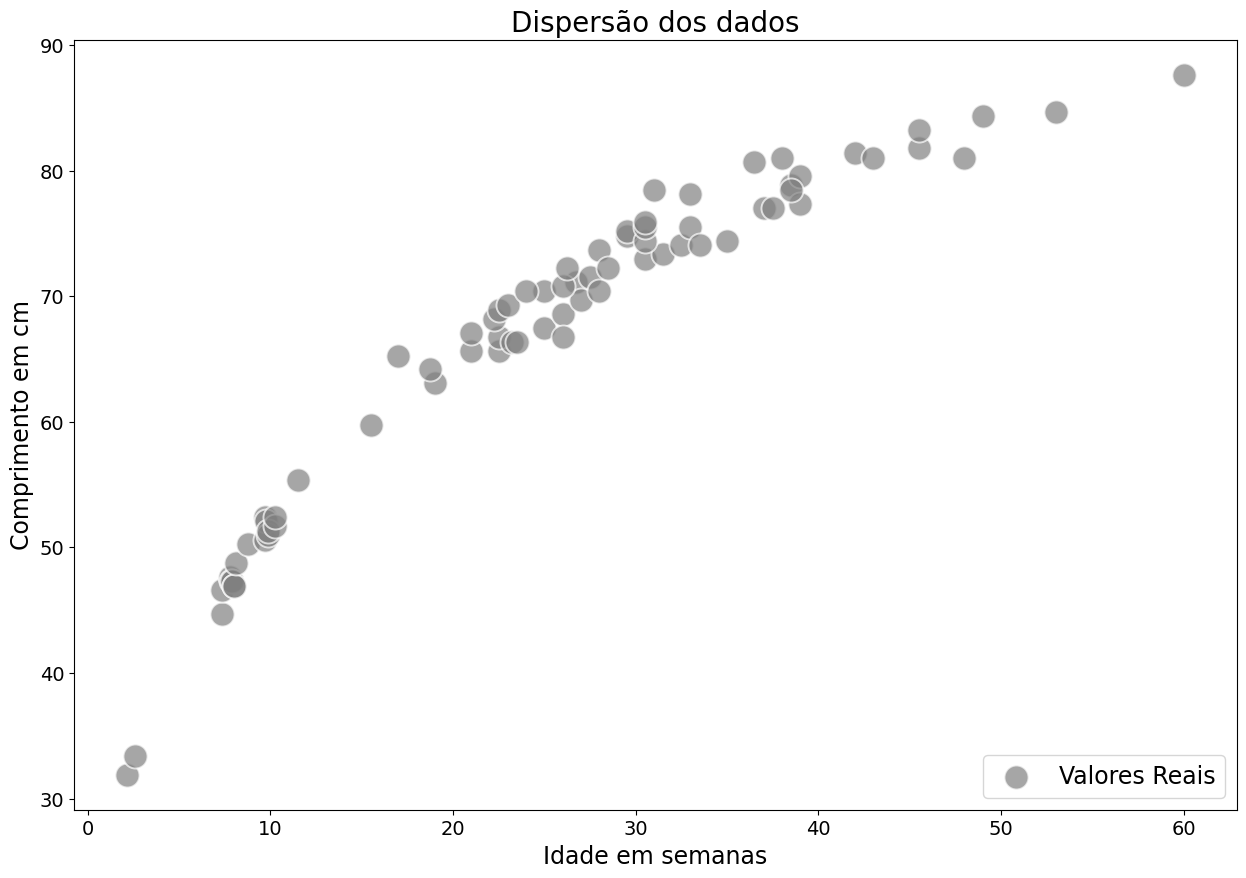

In [3]:
# In[4.1]: Gráfico de dispersão

plt.figure(figsize=(15,10))
sns.scatterplot(x="idade", y="comprimento", data=df_bebes, color='grey',
                s=300, label='Valores Reais', alpha=0.7)
plt.title('Dispersão dos dados', fontsize=20)
plt.xlabel('Idade em semanas', fontsize=17)
plt.ylabel('Comprimento em cm', fontsize=17)
plt.legend(loc='lower right', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

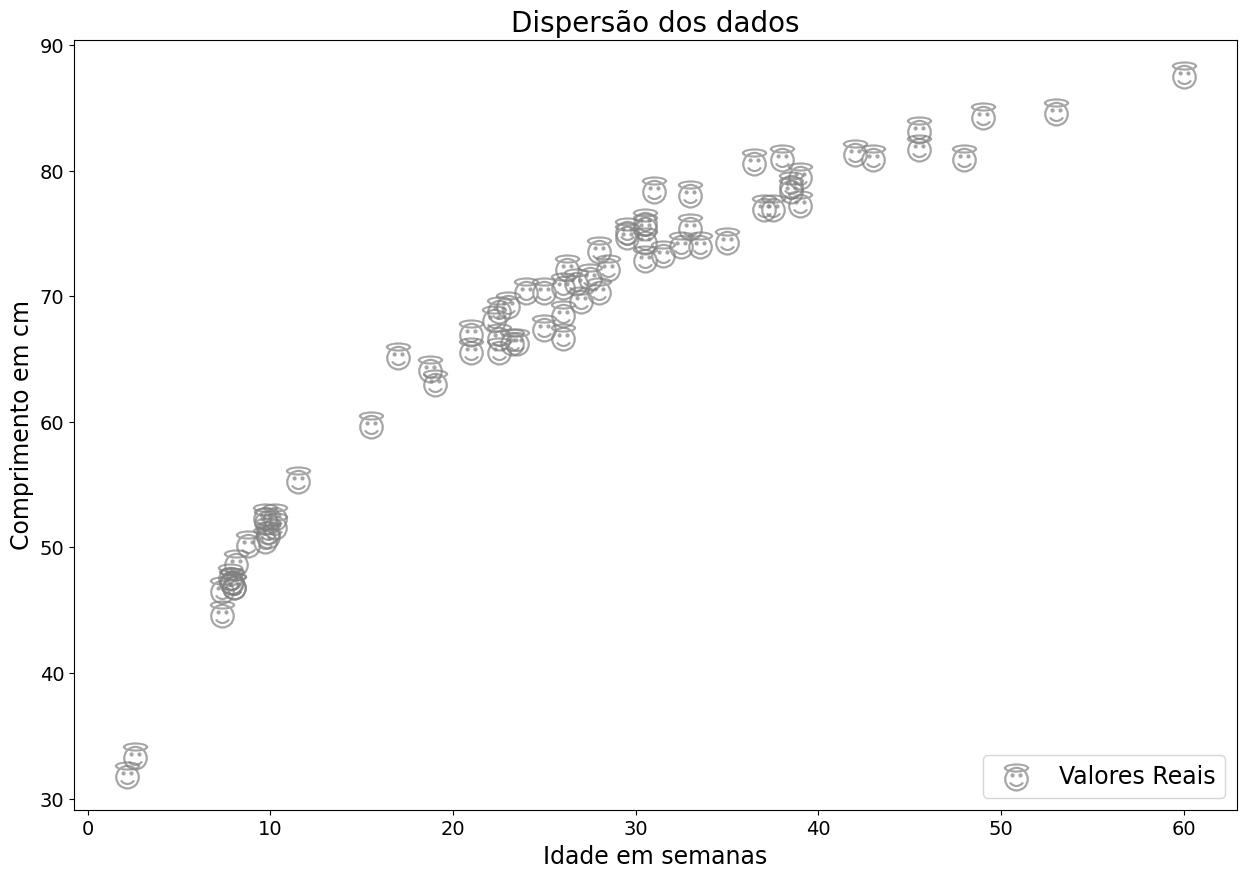

In [4]:
# In[4.2]: Gráfico de dispersão com emojis 01

plt.figure(figsize=(15, 10))
plt.scatter(x="idade", y="comprimento", data=df_bebes, color='grey',
            s=400, label='Valores Reais', alpha=0.7, marker='$\U0001F607$',
            linewidth=0.2)
plt.title('Dispersão dos dados', fontsize=20)
plt.xlabel('Idade em semanas', fontsize=17)
plt.ylabel('Comprimento em cm', fontsize=17)
plt.legend(loc='lower right', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

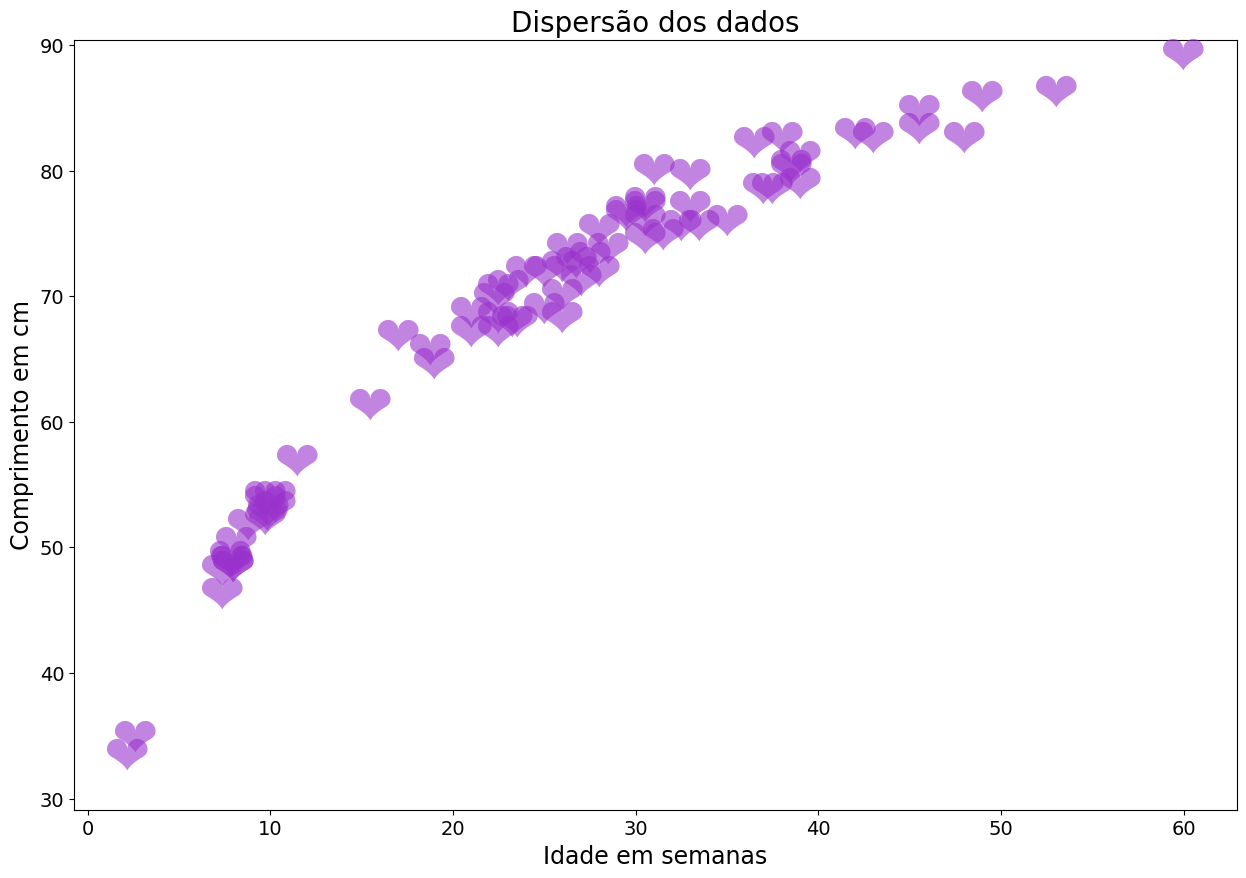

In [5]:
# In[4.3]: Gráfico de dispersão com emojis 02

emojis_coracao = ['❤️'] * len(df_bebes)

plt.figure(figsize=(15, 10))
sns.scatterplot(x="idade", y="comprimento", data=df_bebes, color='none',
                s=0, label=None)
for i, emoji in enumerate(emojis_coracao):
    plt.text(df_bebes['idade'][i], df_bebes['comprimento'][i], emoji,
             fontsize=40, ha='center', alpha=0.6, color='darkorchid')
plt.title('Dispersão dos dados', fontsize=20)
plt.xlabel('Idade em semanas', fontsize=17)
plt.ylabel('Comprimento em cm', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [7]:
# In[4.4]: Estimação de um modelo OLS linear
modelo_linear = sm.OLS.from_formula('comprimento ~ idade', df_bebes).fit()

# Parâmetros do 'modelo_linear'
print(modelo_linear.summary())

                            OLS Regression Results                            
Dep. Variable:            comprimento   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     667.7
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           3.72e-38
Time:                        19:16:50   Log-Likelihood:                -207.26
No. Observations:                  74   AIC:                             418.5
Df Residuals:                      72   BIC:                             423.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.1004      1.034     41.665      0.0

**Obs.: O modelo explica 90,3% da variação da variável dependente, como só temos um parâmetro (idade), podemos afirmar que 90,3% do comprimento do bebê é explicado pela idade**

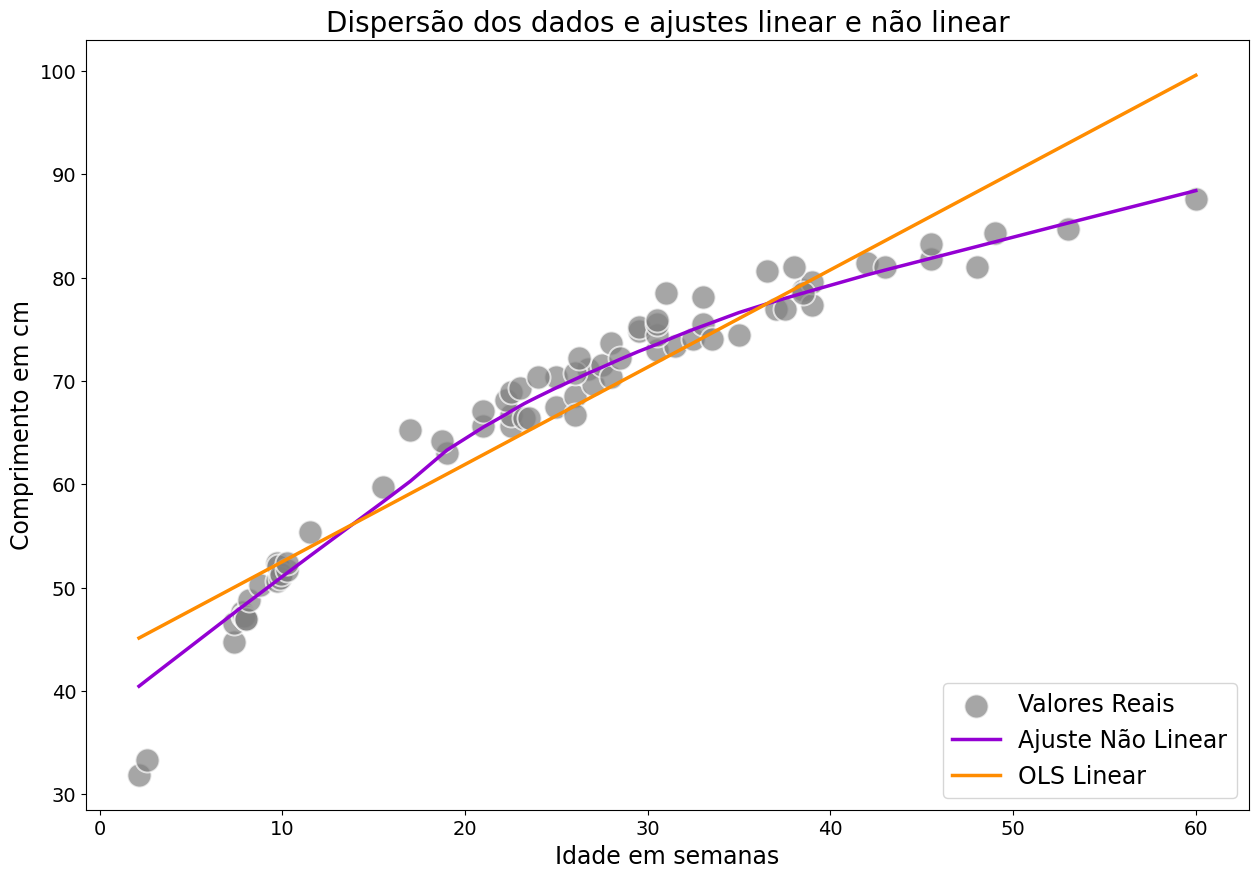

In [8]:
# In[4.5]: Gráfico de dispersão com ajustes (fits) linear e não linear
# com argumento 'lowess=True' (locally weighted scatterplot smoothing)

plt.figure(figsize=(15,10))
sns.scatterplot(x="idade", y="comprimento", data=df_bebes, color='grey',
                s=300, label='Valores Reais', alpha=0.7)
sns.regplot(x="idade", y="comprimento", data=df_bebes, lowess=True,
            color='darkviolet', ci=False, scatter=False, label='Ajuste Não Linear',
            line_kws={'linewidth': 2.5})
sns.regplot(x="idade", y="comprimento", data=df_bebes,
            color='darkorange', ci=False, scatter=False, label='OLS Linear',
            line_kws={'linewidth': 2.5})
plt.title('Dispersão dos dados e ajustes linear e não linear', fontsize=20)
plt.xlabel('Idade em semanas', fontsize=17)
plt.ylabel('Comprimento em cm', fontsize=17)
plt.legend(loc='lower right', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

**Obs.: Se não ocorrerem aderências para cada valor de X da distribuição dos resíduos à normalidade, a construção dos intervalos de confiança para fins preditivos não é fidedigna, ou seja, não posso usar a construção daqueles intervalos de confiança, dos parâmetros destinados para fins preditivos.**

In [21]:
# In[4.6]: Teste de verificação da aderência dos resíduos à normalidade

# Teste de Shapiro-Wilk (n < 30)
# from scipy.stats import shapiro
# shapiro(modelo_linear.resid)

# Teste de Shapiro-Francia (n >= 30)
# Carregamento da função 'shapiro_francia' do pacote 'statstests.tests'
# Autores do pacote: Luiz Paulo Fávero e Helder Prado Santos
# https://stats-tests.github.io/statstests/

from statstests.tests import shapiro_francia

# Teste de Shapiro-Francia: interpretação
teste_sf = shapiro_francia(modelo_linear.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.05 #nível de significância
if p[1] > alpha:
	print('Não se rejeita H0 - Distribuição aderente à normalidade pois o valor do p-value é maior do que 0,05')
else:
	print('Rejeita-se H0 - Distribuição não aderente à normalidade pois o valor do p-value é menor do que 0,05')

method  :  Shapiro-Francia normality test
statistics W  :  0.9087044262594455
statistics z  :  3.627650491545387
p-value  :  0.00014300603555437218
Statistics W=0.90870, p-value=0.000143
Rejeita-se H0 - Distribuição não aderente à normalidade pois o valor do p-value é menor do que 0,05


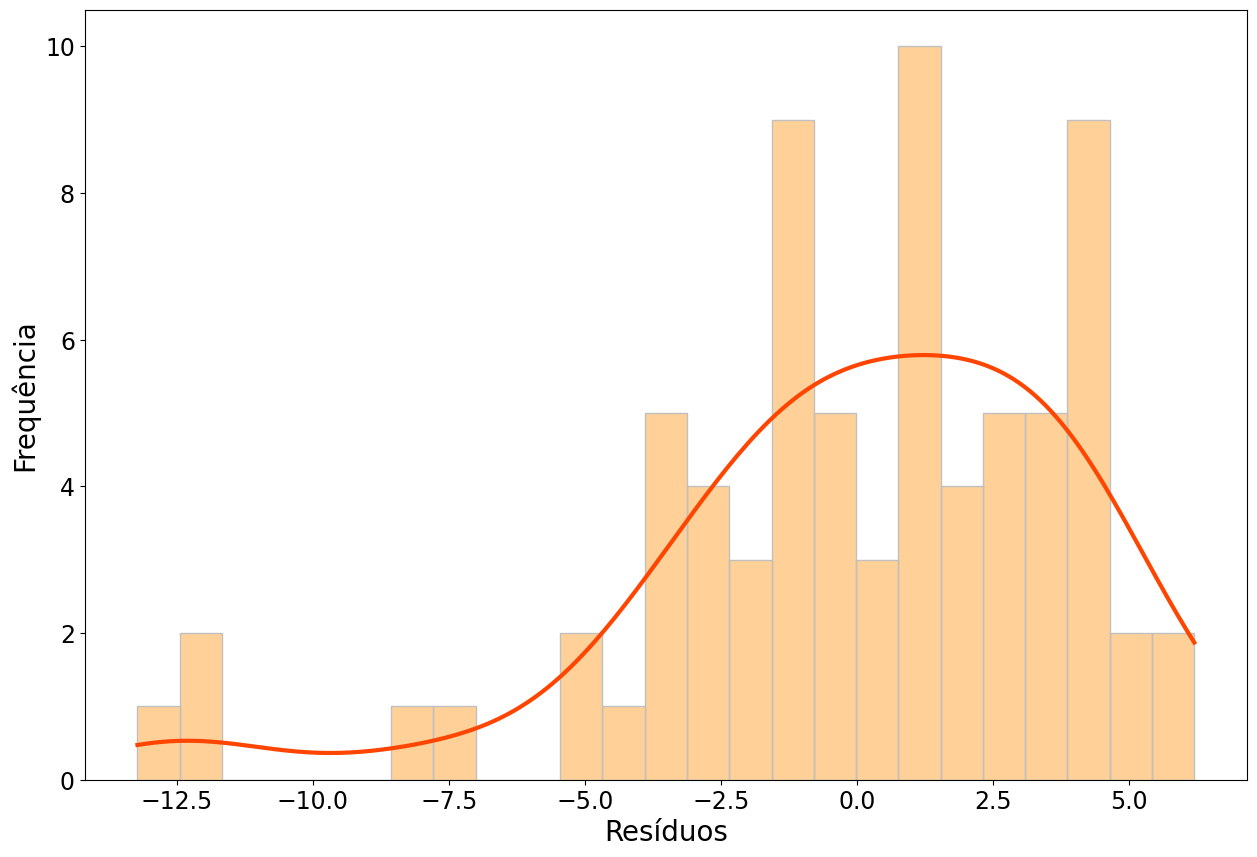

In [22]:
# In[4.7]: Histograma dos resíduos do modelo OLS linear

plt.figure(figsize=(15,10))
hist1 = sns.histplot(data=modelo_linear.resid, kde=True, bins=25,
                     color = 'darkorange', alpha=0.4, edgecolor='silver',
                     line_kws={'linewidth': 3})
hist1.get_lines()[0].set_color('orangered')
plt.xlabel('Resíduos', fontsize=20)
plt.ylabel('Frequência', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

In [11]:
# In[4.8]: Transformação de Box-Cox

# Para o cálculo do lambda de Box-Cox
from scipy.stats import boxcox

# 'yast' é uma variável que traz os valores transformados (Y*)
# 'lmbda' é o lambda de Box-Cox
yast, lmbda = boxcox(df_bebes['comprimento'])

# Inserção da variável transformada ('bc_comprimento') no dataset para a
#estimação de um novo modelo
df_bebes['bc_comprimento'] = yast

df_bebes

# Verificação do cálculo, apenas para fins didáticos
df_bebes['bc_comprimento2'] = ((df_bebes['comprimento']**lmbda)-1)/lmbda

df_bebes

del df_bebes['bc_comprimento2']

In [13]:
# In[4.9]: Estimando um novo modelo OLS com variável dependente
#transformada por Box-Cox

modelo_bc = sm.OLS.from_formula('bc_comprimento ~ idade', df_bebes).fit()

# Parâmetros do 'modelo_bc'
print(modelo_bc.summary())

                            OLS Regression Results                            
Dep. Variable:         bc_comprimento   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     1822.
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           7.16e-53
Time:                        19:18:01   Log-Likelihood:                -681.77
No. Observations:                  74   AIC:                             1368.
Df Residuals:                      72   BIC:                             1372.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4995.1624    630.253      7.926      0.0

In [14]:
# In[4.10]: Comparando os parâmetros do 'modelo_linear' com os do 'modelo_bc'

# CUIDADO!!! OS PARÂMETROS NÃO SÃO DIRETAMENTE COMPARÁVEIS!

summary_col([modelo_linear, modelo_bc])

# Outro modo mais completo também pela função 'summary_col'
summary_col([modelo_linear, modelo_bc],
            model_names=["MODELO LINEAR","MODELO BOX-COX"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs))
        })

# Repare que há um salto na qualidade do ajuste para o modelo não linear (R²)

pd.DataFrame({'R² OLS':[round(modelo_linear.rsquared,4)],
              'R² Box-Cox':[round(modelo_bc.rsquared,4)]})

,R² OLS,R² Box-Cox
0,0.9027,0.962


In [23]:
# In[4.11]: Verificando a normalidade dos resíduos do 'modelo_bc'

# Teste de Shapiro-Francia: interpretação
teste_sf = shapiro_francia(modelo_bc.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.05 #nível de significância
if p[1] > alpha:
	print('Não se rejeita H0 - Distribuição aderente à normalidade pois o valor do p-value é maior do que 0,05')
else:
	print('Rejeita-se H0 - Distribuição não aderente à normalidade pois o valor do p-value é menor do que 0,05')

method  :  Shapiro-Francia normality test
statistics W  :  0.9729952040132682
statistics z  :  1.2666156286386405
p-value  :  0.10264638070808496
Statistics W=0.97300, p-value=0.102646
Não se rejeita H0 - Distribuição aderente à normalidade pois o valor do p-value é maior do que 0,05


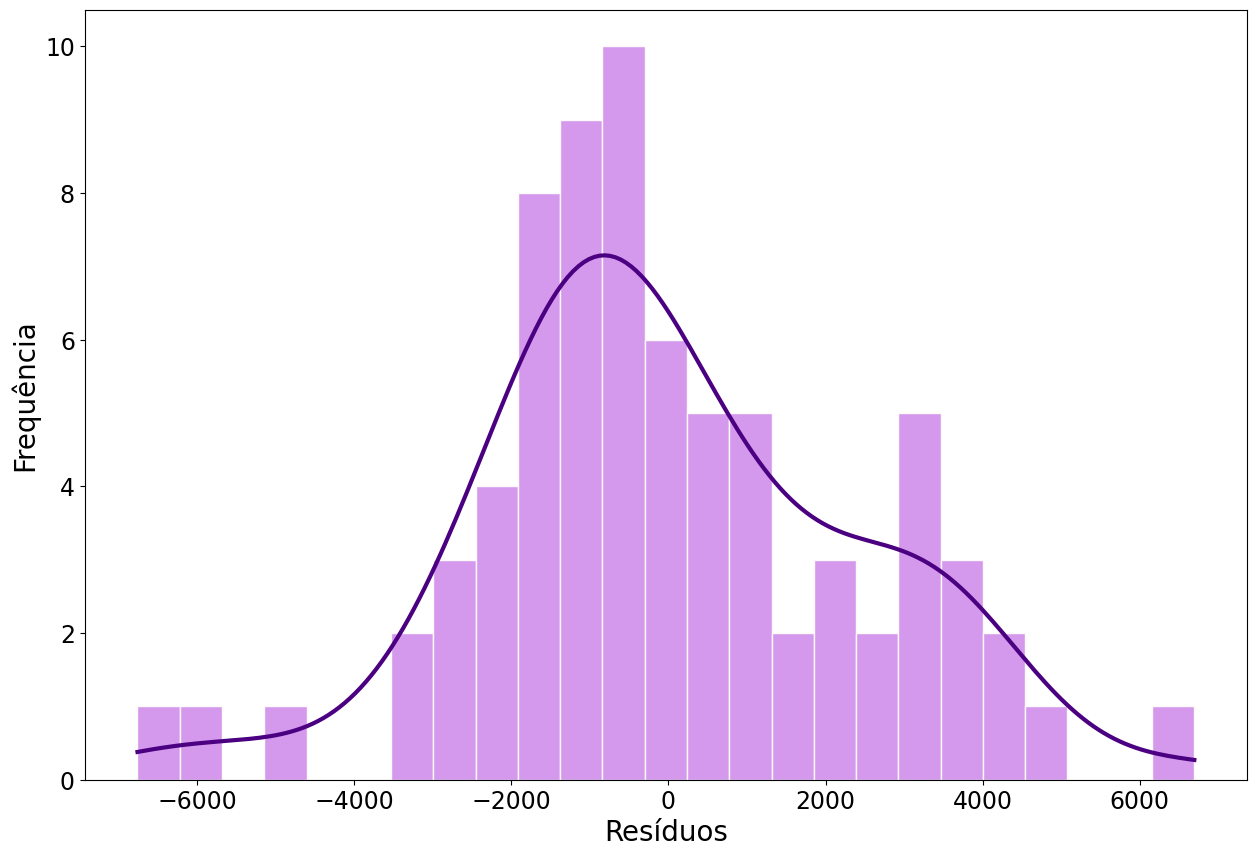

In [24]:
# In[4.12]: Histograma dos resíduos do modelo_bc

plt.figure(figsize=(15,10))
hist2 = sns.histplot(data=modelo_bc.resid, kde=True, bins=25,
                     color='darkviolet', alpha=0.4, edgecolor='snow',
                     line_kws={'linewidth': 3})
hist2.get_lines()[0].set_color('indigo')
plt.xlabel('Resíduos', fontsize=20)
plt.ylabel('Frequência', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

In [17]:
# In[4.13]: Fazendo predições com os modelos OLS linear e Box-Cox
# Qual é o comprimento esperado de um bebê com 52 semanas de vida?

# Modelo OLS Linear:
modelo_linear.predict(pd.DataFrame({'idade':[52]}))

# Modelo Não Linear (Box-Cox):
modelo_bc.predict(pd.DataFrame({'idade':[52]}))

# Não podemos nos esquecer de fazer o cálculo inverso para a obtenção do fitted
#value de Y (variável 'comprimento')
(54251.109775 * lmbda + 1) ** (1 / lmbda)

np.float64(87.1400408864658)

In [18]:
# In[4.14]: Salvando os fitted values dos dois modelos (modelo_linear e modelo_bc)
#no dataset 'bebes'

df_bebes['yhat_linear'] = modelo_linear.fittedvalues
df_bebes['yhat_modelo_bc'] = (modelo_bc.fittedvalues * lmbda + 1) ** (1 / lmbda)
df_bebes

,comprimento,idade,bc_comprimento,yhat_linear,yhat_modelo_bc
0,63.07,19.00,22966.098585,60.981260,63.097300
1,65.63,21.00,25529.082601,62.863455,65.004303
2,65.63,22.50,25529.082601,64.275102,66.375858
3,66.73,22.50,26682.740508,64.275102,66.375858
4,66.37,23.25,26301.675535,64.980925,67.044337
...,...,...,...,...,...
69,75.90,30.50,37577.517076,71.803884,73.004869
70,78.47,31.00,41056.631959,72.274433,73.386942
71,80.67,36.50,44189.039660,77.450471,77.388462
72,81.03,38.00,44715.349755,78.862117,78.422026


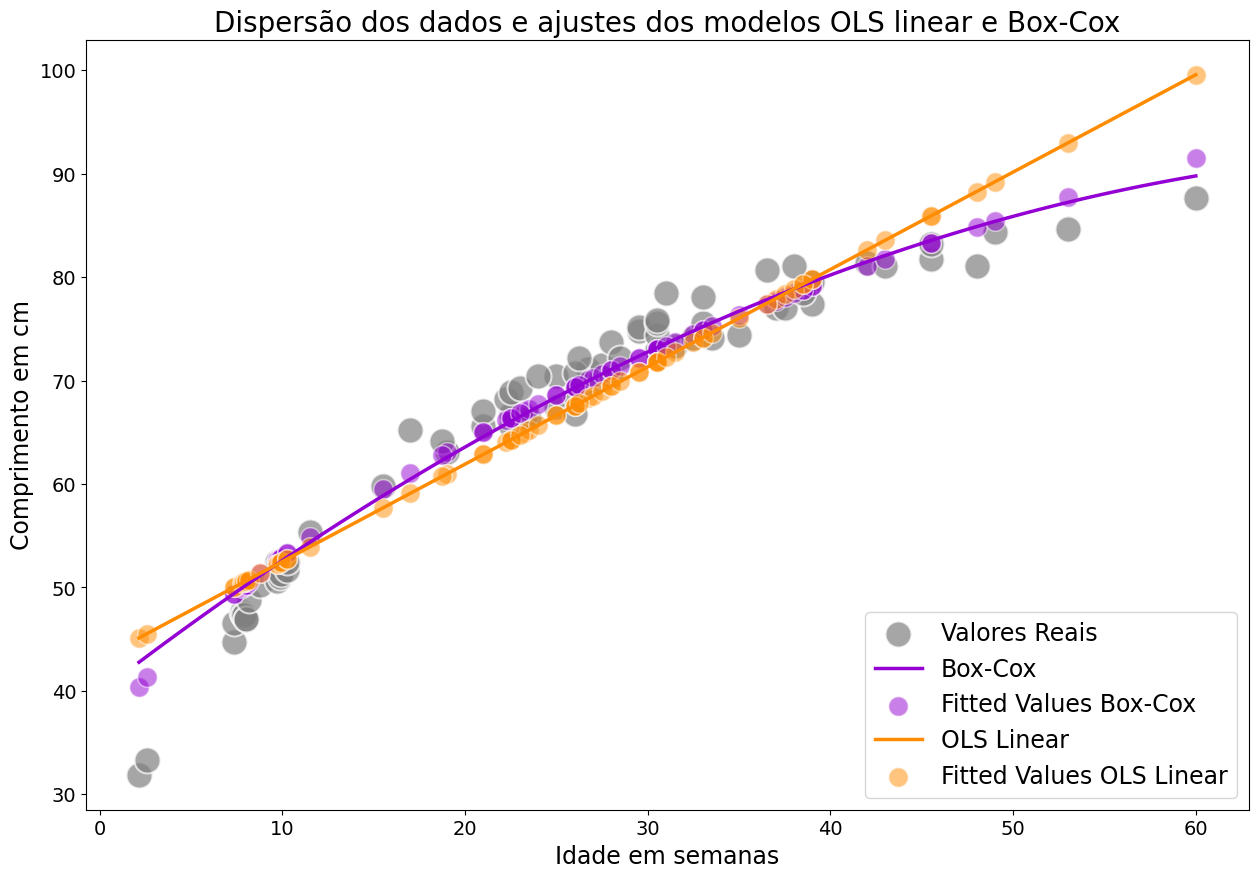

In [19]:
# In[4.15]: Gráfico de dispersão com ajustes dos modelos OLS linear e Box-Cox

plt.figure(figsize=(15,10))
sns.scatterplot(x="idade", y="comprimento", data=df_bebes, color='grey',
                s=350, label='Valores Reais', alpha=0.7)
sns.regplot(x="idade", y="yhat_modelo_bc", data=df_bebes, order=lmbda,
            color='darkviolet', ci=False, scatter=False, label='Box-Cox',
            line_kws={'linewidth': 2.5})
sns.scatterplot(x="idade", y="yhat_modelo_bc", data=df_bebes, color='darkviolet',
                s=200, label='Fitted Values Box-Cox', alpha=0.5)
sns.regplot(x="idade", y="yhat_linear", data=df_bebes,
            color='darkorange', ci=False, scatter=False, label='OLS Linear',
            line_kws={'linewidth': 2.5})
sns.scatterplot(x="idade", y="yhat_linear", data=df_bebes, color='darkorange',
                s=200, label='Fitted Values OLS Linear', alpha=0.5)
plt.title('Dispersão dos dados e ajustes dos modelos OLS linear e Box-Cox',
          fontsize=20)
plt.xlabel('Idade em semanas', fontsize=17)
plt.ylabel('Comprimento em cm', fontsize=17)
plt.legend(loc='lower right', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [20]:
# In[4.16]: Gráfico de dispersão com ajustes dos modelos OLS linear e Box-Cox,
#com interação (figura 'EXEMPLO4.html' salva na pasta do curso)

# Ajuste polinomial com grau igual a lambda (lmbda = 2.659051008426254)
coefficients = np.polyfit(df_bebes["idade"], df_bebes["yhat_modelo_bc"], lmbda)
x_range = np.linspace(df_bebes["idade"].min(), df_bebes["idade"].max(), 100)
y_quadratic = np.polyval(coefficients, x_range)

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_bebes["idade"], y=df_bebes["comprimento"],
                         mode='markers',
                         marker=dict(color='grey', opacity=0.7, size=20),
                         name='Valores Reais'))

fig.add_trace(go.Scatter(x=x_range, y=y_quadratic,
                         mode='lines',
                         line=dict(color='darkviolet', width=2),
                         name='Box-Cox'))

fig.add_trace(go.Scatter(x=df_bebes["idade"], y=df_bebes["yhat_modelo_bc"],
                         mode='markers',
                         marker=dict(color='darkviolet', opacity=0.5, size=15),
                         name='Fitted Values Box-Cox',
                         hovertemplate='Fitted Values Box-Cox: %{y:.2f}<extra></extra>'))

fig.add_trace(go.Scatter(x=df_bebes["idade"], y=df_bebes["yhat_linear"],
                         mode='lines',
                         marker=dict(color='darkorange'),
                         name='OLS Linear',
                         hovertemplate='Fitted Values OLS Linear: %{y:.2f}<extra></extra>'))

fig.add_trace(go.Scatter(x=df_bebes["idade"], y=df_bebes["yhat_linear"],
                         mode='markers',
                         marker=dict(color='darkorange', opacity=0.5, size=15),
                         name='Fitted Values OLS Linear',
                         hovertemplate='Fitted Values OLS Linear: %{y:.2f}<extra></extra>'))

fig.update_layout(title={
        'text': 'Dispersão dos dados e ajustes dos modelos OLS linear e Box-Cox',
        'font': {'size': 20, 'color': 'black', 'family': 'Arial'},
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title='Idade em semanas',
    yaxis_title='Comprimento em cm',
    legend=dict(x=1.02, y=1),
    template='plotly_white')

fig.update_annotations(dict(xref="x", yref="y"))
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

fig.show()